# Try out stuff...

## General Stuff

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 

plt.style.use("ggplot")

In [4]:
from pathlib import Path
DATA_PATH = Path("../data/REFIT.h5").absolute().__str__()

from nilmtk import DataSet
refit = DataSet(DATA_PATH, format="HDF")        # hierarchical data frame  

In [5]:
type(refit)

nilmtk.dataset.DataSet

In [6]:
def ndir(x):
    """ Show properties and methods with no magic methods """
    return [x for x in dir(x) if not x.__contains__("__")]

ndir(refit)

['_init_buildings',
 'buildings',
 'clear_cache',
 'describe',
 'elecs',
 'get_activity_script',
 'import_metadata',
 'metadata',
 'plot_good_sections',
 'plot_mains_power_histograms',
 'save',
 'set_window',
 'store']

In [7]:
from nilmtk.utils import print_dict
print_dict(refit.metadata)              # show meta data in nice html format

In [8]:
refit.set_window(start="2014-01-01", end="2014-01-05")      # set window for only a small chunk

## Explore Building

In [9]:
refit.buildings[1]

Building(instance=1, dataset='REFIT')

In [10]:
refit.buildings[1].metadata

{'instance': 1, 'original_name': 'House1', 'dataset': 'REFIT'}

In [11]:
ndir(refit.buildings[1])         # nothing interesting, besides elec

['describe', 'elec', 'identifier', 'import_metadata', 'metadata', 'save']

## Explore MeterGroup (elec)

In [12]:
elec = refit.buildings[10].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=10, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', instance=1)])
  ElecMeter(instance=3, building=10, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=4, building=10, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=10, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=6, building=10, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=10, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=10, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=10, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=

In [13]:
elec[2]

ElecMeter(instance=2, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', instance=1)])

In [14]:
ndir(elec)

['_aggregate_metadata_attribute',
 '_check_kwargs_for_full_results_and_sections',
 '_collect_stats_on_all_meters',
 '_convert_physical_quantity_and_ac_type_to_cols',
 '_energy_per_meter_with_remainder',
 '_meter_generators',
 '_plot_area',
 '_plot_energy_bar',
 '_plot_sankey',
 '_plot_separate_lines',
 '_prep_kwargs_for_sample_period_and_resample',
 '_replace_none_with_meter_timeframe',
 '_set_sample_period',
 'activation_series',
 'activity_histogram',
 'all_meters',
 'appliances',
 'available_ac_types',
 'available_physical_quantities',
 'available_power_ac_types',
 'average_energy_per_period',
 'building',
 'call_method_on_all_meters',
 'clear_cache',
 'contains_meters_from_multiple_buildings',
 'correlation',
 'correlation_of_sum_of_submeters_with_mains',
 'dataframe_of_meters',
 'dataset',
 'describe',
 'disabled_meters',
 'dominant_appliance',
 'dominant_appliances',
 'draw_wiring_graph',
 'dropout_rate',
 'energy_per_meter',
 'entropy',
 'entropy_per_meter',
 'fraction_per_meter

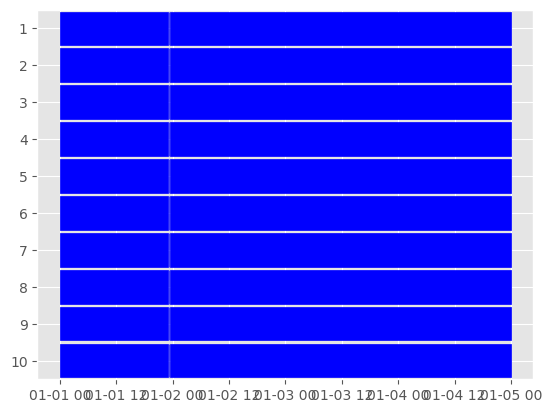

In [15]:
elec.plot_good_sections()

In [16]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.3714788682501021

9/9 ElecMeter(instance=10, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', instance=2)])

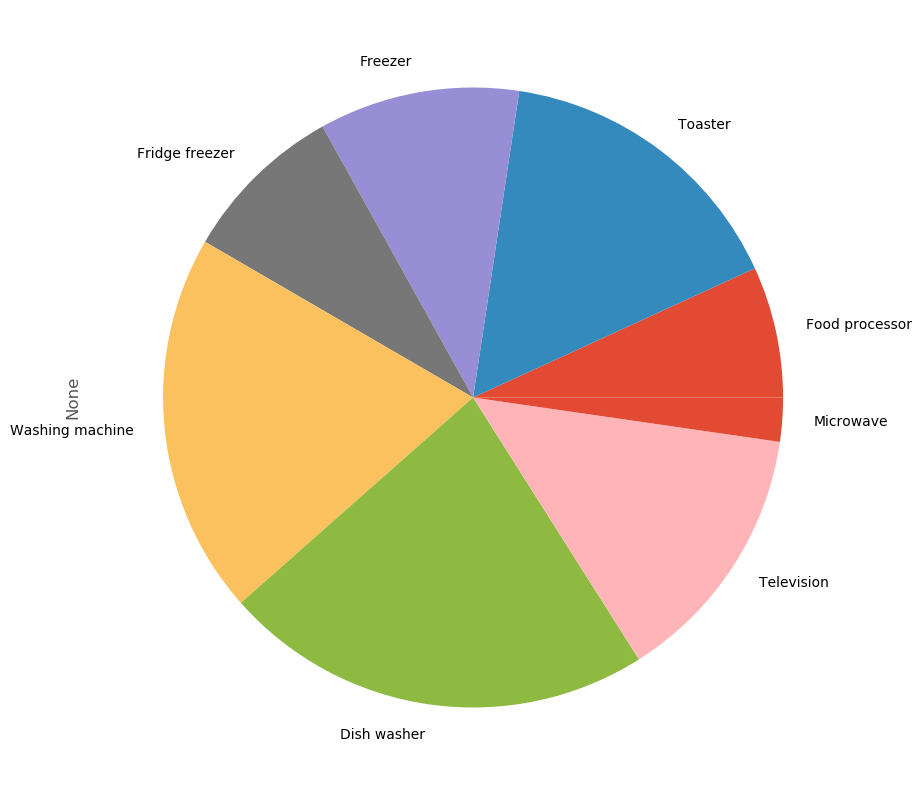

In [17]:
fraction = elec.submeters().fraction_per_meter().dropna()
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels)

In [18]:
result = dict(zip(labels, fraction))
result

{'Food processor': 0.0,
 'Toaster': 0.1577848611452245,
 'Freezer': 0.10453481134984381,
 'Fridge freezer': 0.08551776198174617,
 'Washing machine': 0.19902439749625975,
 'Dish washer': 0.22461538414539517,
 'Television': 0.13723371691051128,
 'Microwave': 0.022887209491305054}

## Explore Mains and Submeters

In [19]:
elec.mains()        # aggregate

ElecMeter(instance=1, building=10, dataset='REFIT', site_meter, appliances=[])

In [20]:
elec.submeters()    # submeters

MeterGroup(meters=
  ElecMeter(instance=2, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', instance=1)])
  ElecMeter(instance=3, building=10, dataset='REFIT', appliances=[Appliance(type='toaster', instance=1)])
  ElecMeter(instance=4, building=10, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=10, dataset='REFIT', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=6, building=10, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=10, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=10, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=10, dataset='REFIT', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=10, building=10, dataset='REFIT', appliances=[Appliance(type='food processor', in

In [21]:
aggregate = elec.mains().load(sample_period=60)         # returns generator 
aggregate = next(aggregate)                             # execute

In [22]:
type(aggregate)

pandas.core.frame.DataFrame

In [23]:
aggregate.head()

physical_quantity,power
type,active
Unix,
2014-01-01 00:00:00+00:00,2967.333333
2014-01-01 00:01:00+00:00,2954.888889
2014-01-01 00:02:00+00:00,2963.600000
2014-01-01 00:03:00+00:00,2927.777778
2014-01-01 00:04:00+00:00,2935.222222


In [24]:
aggregate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5760 entries, 2014-01-01 00:00:00+00:00 to 2014-01-04 23:59:00+00:00
Freq: 60S
Data columns (total 1 columns):
(power, active)    5749 non-null float64
dtypes: float64(1)
memory usage: 90.0 KB


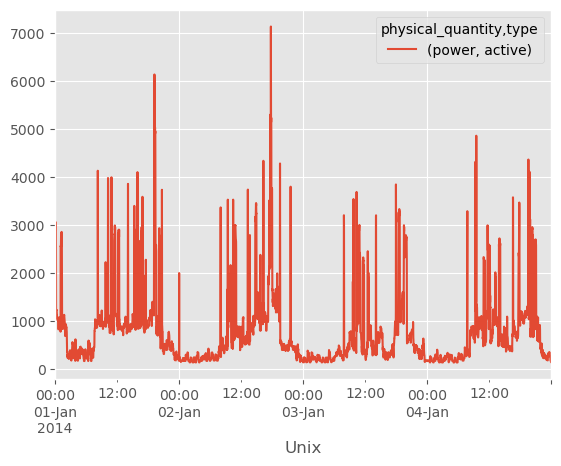

In [25]:
aggregate.plot()

In [26]:
app = elec[4]
ndir(app)

['_ac_type_to_columns',
 '_aggregate_metadata_attribute',
 '_check_store',
 '_compute_stat',
 '_convert_physical_quantity_and_ac_type_to_cols',
 '_get_columns_with_best_ac_type',
 '_get_stat_from_cache_or_compute',
 '_identifier_attr',
 '_physical_quantity_to_columns',
 '_prep_kwargs_for_sample_period_and_resample',
 '_pretty_label',
 '_replace_none_with_meter_timeframe',
 '_set_sample_period',
 'activation_series',
 'activity_histogram',
 'appliances',
 'available_ac_types',
 'available_columns',
 'available_physical_quantities',
 'available_power_ac_types',
 'average_energy_per_period',
 'building',
 'cache',
 'clear_cache',
 'correlation',
 'dataset',
 'device',
 'dominant_appliance',
 'dropout_rate',
 'dry_run_metadata',
 'entropy',
 'get_activations',
 'get_cached_stat',
 'get_metadata',
 'get_source_node',
 'get_timeframe',
 'good_sections',
 'identifier',
 'instance',
 'is_site_meter',
 'key',
 'key_for_cached_stat',
 'label',
 'load',
 'load_meter_devices',
 'load_series',
 'ma

In [27]:
app.available_columns()

[('power', 'active')]

In [28]:
app.label()

'Freezer'

In [29]:
app.appliances[0].metadata

{'original_name': 'Chest Freezer',
 'type': 'freezer',
 'instance': 1,
 'meters': [4],
 'dataset': 'REFIT',
 'building': 10}

In [30]:
app = app.load(sample_period=60)
app = next(app)

In [31]:
app.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5760 entries, 2014-01-01 00:00:00+00:00 to 2014-01-04 23:59:00+00:00
Freq: 60S
Data columns (total 1 columns):
(power, active)    5749 non-null float64
dtypes: float64(1)
memory usage: 90.0 KB


In [32]:
app.head()

physical_quantity,power
type,active
Unix,
2014-01-01 00:00:00+00:00,0.0
2014-01-01 00:01:00+00:00,0.0
2014-01-01 00:02:00+00:00,0.0
2014-01-01 00:03:00+00:00,0.0
2014-01-01 00:04:00+00:00,0.0


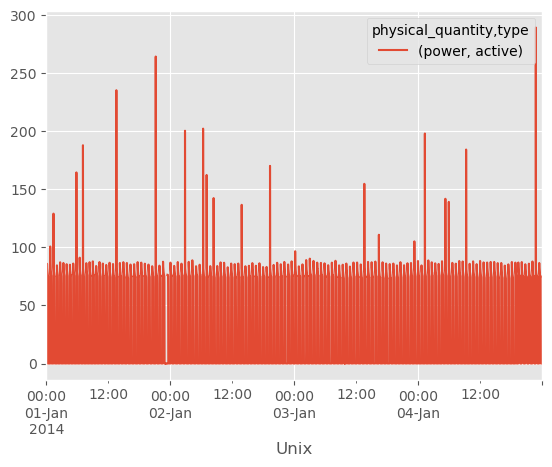

In [33]:
app.plot()

## Explore Dataframe

In [32]:
df = elec.dataframe_of_meters(sample_period=60)
labels = elec.get_labels(df.columns.values)
df = df.set_axis(labels, axis=1, inplace=False)

In [33]:
df.head()

,Site meter,Food processor,Toaster,Freezer,Fridge freezer,Washing machine,Dish washer,Television,Microwave,Food processor
Unix,,,,,,,,,,
2014-01-01 00:00:00+00:00,2967.333333,73.666667,0.0,0.0,106.500000,0.0,1897.833333,61.333333,0.0,0.0
2014-01-01 00:01:00+00:00,2954.888889,72.555556,0.0,0.0,105.111111,0.0,1896.777778,64.888889,0.0,0.0
2014-01-01 00:02:00+00:00,2963.600000,73.300000,0.0,0.0,103.800000,0.0,1895.300000,60.500000,0.0,0.0
2014-01-01 00:03:00+00:00,2927.777778,72.555556,0.0,0.0,102.222222,0.0,1861.555556,64.333333,0.0,0.0
2014-01-01 00:04:00+00:00,2935.222222,73.333333,0.0,0.0,100.222222,0.0,1860.555556,65.222222,0.0,0.0


In [34]:
df.describe()

,Site meter,Food processor,Toaster,Freezer,Fridge freezer,Washing machine,Dish washer,Television,Microwave,Food processor
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.0
mean,766.813091,19.433715,44.841088,29.710931,24.309070,56.463264,63.805355,39.008180,6.536797,0.0
std,754.766691,36.182248,33.318243,38.188168,43.808603,281.061163,311.283374,25.949171,77.624463,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,272.575000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,24.666667,0.000000,0.0
50%,514.416667,0.000000,68.818182,0.000000,0.000000,0.000000,1.555556,24.900000,0.000000,0.0
75%,929.625000,0.000000,70.500000,75.900000,0.933333,0.000000,1.800000,62.300000,0.000000,0.0
max,7131.125000,170.600000,136.800000,289.400000,563.200000,2146.500000,1897.833333,109.800000,1218.000000,0.0


## Just Pandas

Not really fruitful... also `pandas` is pinned on version `0.25.3` due to `nilmtk`, several major versions behind and before a stable release of `pandas`. 

In [63]:
hdf = pd.HDFStore(DATA_PATH, mode="r")

In [64]:
hdf.keys()

['/building9/elec/meter1',
 '/building9/elec/meter10',
 '/building9/elec/meter2',
 '/building9/elec/meter3',
 '/building9/elec/meter4',
 '/building9/elec/meter5',
 '/building9/elec/meter6',
 '/building9/elec/meter7',
 '/building9/elec/meter8',
 '/building9/elec/meter9',
 '/building9/elec/cache/meter9/total_energy',
 '/building9/elec/cache/meter8/total_energy',
 '/building9/elec/cache/meter7/total_energy',
 '/building9/elec/cache/meter6/total_energy',
 '/building9/elec/cache/meter5/total_energy',
 '/building9/elec/cache/meter4/total_energy',
 '/building9/elec/cache/meter3/total_energy',
 '/building9/elec/cache/meter2/total_energy',
 '/building9/elec/cache/meter10/total_energy',
 '/building9/elec/cache/meter1/good_sections',
 '/building9/elec/cache/meter1/total_energy',
 '/building8/elec/meter1',
 '/building8/elec/meter10',
 '/building8/elec/meter2',
 '/building8/elec/meter3',
 '/building8/elec/meter4',
 '/building8/elec/meter5',
 '/building8/elec/meter6',
 '/building8/elec/meter7',
 '/b

In [67]:
# Kinda worthless... start & end expects integers, but does not show any changes in rows
hdf.select(key="building9/elec/cache/meter9/total_energy", start=1, end=2)  

,active,end
2013-12-18 03:24:43+00:00,0.000514,2013-12-18 03:31:07+00:00
2013-12-18 03:48:01+00:00,0.132217,2013-12-19 06:14:40+00:00
2013-12-19 06:23:17+00:00,0.009775,2013-12-19 08:20:39+00:00
2013-12-19 08:23:22+00:00,0.000069,2013-12-19 08:24:14+00:00
2013-12-19 08:28:15+00:00,0.000179,2013-12-19 08:30:26+00:00
...,...,...
2015-07-03 01:38:07+01:00,0.512876,2015-07-07 08:12:45+01:00
2015-07-07 08:15:09+01:00,0.001028,2015-07-07 08:27:36+01:00
2015-07-07 08:30:14+01:00,0.010586,2015-07-07 10:37:23+01:00
2015-07-07 10:42:09+01:00,0.082389,2015-07-08 03:10:56+01:00


In [71]:
# same as above
pd.read_hdf(hdf, key="building9/elec/cache/meter9/total_energy", start=1, end=3)


,active,end
2013-12-18 03:24:43+00:00,0.000514,2013-12-18 03:31:07+00:00
2013-12-18 03:48:01+00:00,0.132217,2013-12-19 06:14:40+00:00
2013-12-19 06:23:17+00:00,0.009775,2013-12-19 08:20:39+00:00
2013-12-19 08:23:22+00:00,0.000069,2013-12-19 08:24:14+00:00
2013-12-19 08:28:15+00:00,0.000179,2013-12-19 08:30:26+00:00
...,...,...
2015-07-03 01:38:07+01:00,0.512876,2015-07-07 08:12:45+01:00
2015-07-07 08:15:09+01:00,0.001028,2015-07-07 08:27:36+01:00
2015-07-07 08:30:14+01:00,0.010586,2015-07-07 10:37:23+01:00
2015-07-07 10:42:09+01:00,0.082389,2015-07-08 03:10:56+01:00


## Experimentation API

In [77]:
from nilmtk.api import API
from nilmtk.disaggregate import CO
import warnings
warnings.filterwarnings("ignore")

In [93]:
experiment1 = {
  'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
  'sample_rate': 60,
  'appliances': ['toaster','freezer'],
  'chunksize': 1000,
  'methods': {"CO":CO({})},
  'train': {    
    'datasets': {
        'Dataport': {
            'path': DATA_PATH,
            'buildings': {
                10: {
                    'start_time': '2014-01-01',
                    'end_time': '2014-01-04'
                    }
                }                
            }
        }
    },
  'test': {
    'datasets': {
        'Dataport': {
            'path': DATA_PATH,
            'buildings': {
                10: {
                    'start_time': '2014-01-04',
                    'end_time': '2014-01-05'
                    }
                }
            }
        },
        'metrics':['rmse', 'f1score']
    }
}

In [94]:
api_results_experiment_1 = API(experiment1)

Joint Testing for all algorithms
Loading data for  Dataport  dataset
Dropping missing values
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  rmse  ..............er'
                CO
toaster  42.740168
freezer  61.954904
............  f1score  ..............
               CO
toaster  0.777070
freezer  0.575668


In [95]:
ndir(api_results_experiment_1)

['DROP_ALL_NANS',
 'appliances',
 'artificial_aggregate',
 'call_predict',
 'chunk_size',
 'classifiers',
 'compute_loss',
 'display_predictions',
 'dropna',
 'errors',
 'errors_keys',
 'experiment',
 'gt_overall',
 'methods',
 'metrics',
 'power',
 'pred_overall',
 'predict',
 'sample_period',
 'site_only',
 'store_classifier_instances',
 'storing_key',
 'test_chunk_wise',
 'test_datasets_dict',
 'test_jointly',
 'test_mains',
 'test_submeters',
 'train_chunk_wise',
 'train_datasets_dict',
 'train_jointly',
 'train_mains',
 'train_submeters']

In [96]:
api_results_experiment_1.pred_overall

{'CO':                            toaster  freezer
 Unix                                       
 2014-01-04 00:00:00+00:00     70.0     79.0
 2014-01-04 00:01:00+00:00     70.0     79.0
 2014-01-04 00:02:00+00:00     70.0     79.0
 2014-01-04 00:03:00+00:00     70.0     79.0
 2014-01-04 00:04:00+00:00     70.0     79.0
 ...                            ...      ...
 2014-01-04 23:55:00+00:00     70.0     79.0
 2014-01-04 23:56:00+00:00     70.0     79.0
 2014-01-04 23:57:00+00:00     70.0     79.0
 2014-01-04 23:58:00+00:00     70.0     79.0
 2014-01-04 23:59:00+00:00     70.0     79.0
 
 [1440 rows x 2 columns]}